In [101]:
import numpy as np
import importlib
import matplotlib.pyplot as plt
import common_functions as cf
from scipy.optimize import fsolve

importlib.reload(cf)

def calculate_B(x, y, z, alpha=0, beta=0, gamma=0):
    
    # alpha = 0
    # beta = 0
    # gamma = 0

    mumu0 = 1.256 * 10**(-6) * 1

    R = np.array([[np.cos(beta) * np.cos(gamma), np.cos(beta) * np.cos(gamma), -np.sin(beta)],
                    [- np.cos(alpha) * np.sin(gamma) + np.sin(alpha) * np.sin(beta) * np.cos(gamma), - np.cos(alpha) * np.cos(gamma) + np.sin(alpha) * np.sin(beta) * np.sin(gamma), np.sin(alpha) * np.cos(beta)],
                    [np.sin(alpha) * np.sin(gamma) + np.cos(alpha) * np.sin(beta) * np.cos(gamma), - np.sin(alpha) * np.cos(gamma) + np.cos(alpha) * np.sin(beta) * np.sin(gamma), np.cos(alpha) * np.cos(beta)]])

    r = np.sqrt(x**2 + y**2 + z**2)

    Bx = mumu0 / (4 * np.pi * r**5) * (3 * x * z)
    By = mumu0 / (4 * np.pi * r**5) * (3 * y * z)
    Bz = mumu0 / (4 * np.pi * r**5) * (2 * z**2 - x**2 - y**2)

    Blocal = np.array([Bx, By, Bz])

    return np.linalg.inv(R) @ Blocal

def calculate_B_fsolve(p, target_B):
    x, y, z, a, b, g = p
    B = calculate_B(x, y, z, a, b, g)
    return list(B - target_B) + [0, 0, 0]

/tmp/ipykernel_92389/558040313.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measurements_df.dropna(inplace=True)
/tmp/ipykernel_92389/558040313.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  measurements_df.loc[:, f'{letter}{i}'] /= old_factors[j]
/tmp/ipykernel_92389/558040313.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

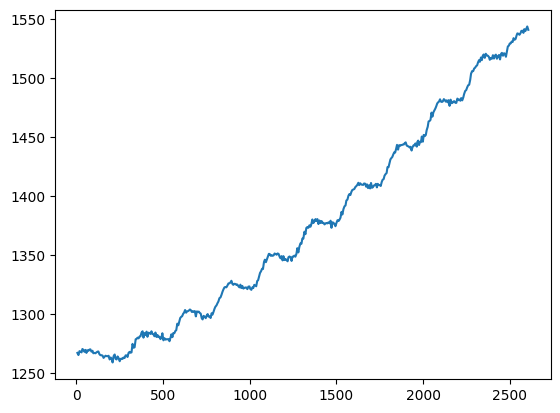

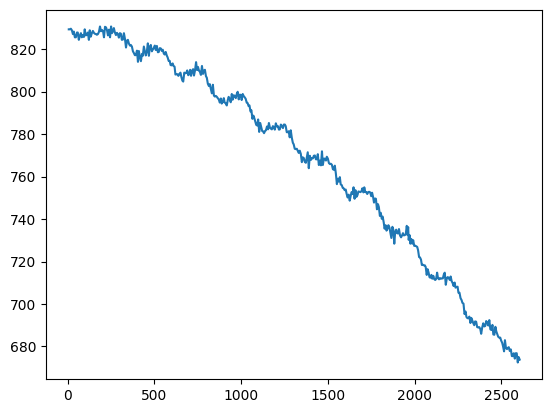

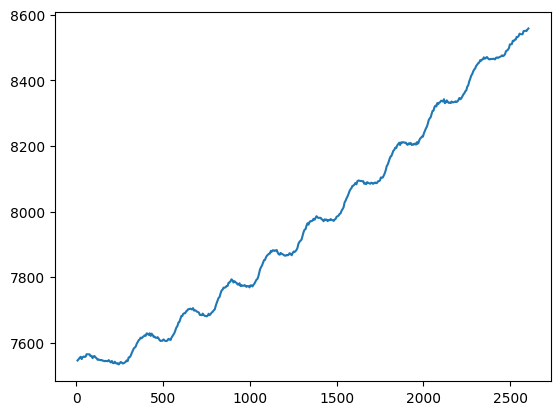

0.002


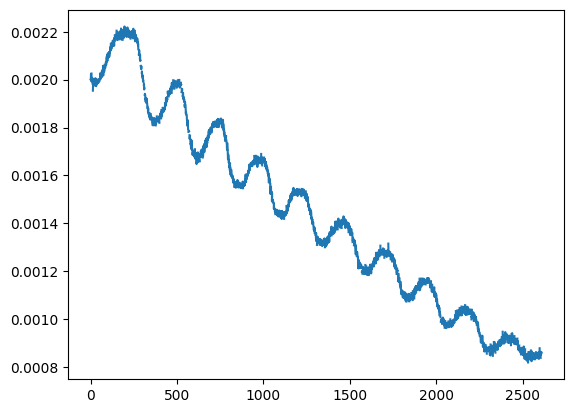

In [97]:
df = cf.read_csv_file("./data/single_Z_test.csv")

# Actual measurements were
# 00...00 to 100...00 : 0 to 15859.712 uT
# 10...00 to 111...11 : -15859.712 to -0.242 uT
# Data from CSV must first be divided 

old_factors = [0.300, 0.300, 0.484]
new_factors = [0.150, 0.150, 0.242]

measurements_df = df[["X0", "Y0", "Z0"] + ["X1", "Y1", "Z1"] + ["X2", "Y2", "Z2"] + ["X3", "Y3", "Z3"]]
measurements_df.dropna(inplace=True)

# Correction of data
for i in range(4):
  for j, letter in enumerate(["X", "Y", "Z"]):
    
    # Correction
    measurements_df.loc[:, f'{letter}{i}'] /= old_factors[j]
    measurements_df.loc[:, f'{letter}{i}'] += 32768
    
    # 2's complement
    measurements_df[f'{letter}{i}'][df[f'{letter}{i}'] > 2**16] -= 2**16
    
    # Correct factor (to uT)
    measurements_df[f'{letter}{i}'] *= new_factors[j]

  if i == 0:
    plt.plot(measurements_df["X0"])
    plt.show()
    plt.plot(measurements_df["Y0"])
    plt.show()
    plt.plot(measurements_df["Z0"])
    plt.show()
    

z_data = df["Z"] - df["Z"][0]
z_data += 0.002

print(z_data[0])

plt.plot(z_data)

[ 24.98732607  24.96720958  24.13809441 ... 311.78322442 311.56096045
 314.33752464]


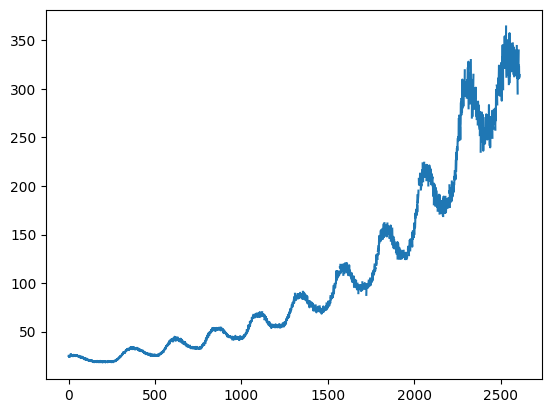

In [98]:
# Bz field without silicon /
B = calculate_B(0, 0, z_data)
plt.plot(B[2])
print(B[2])

(461, 3)


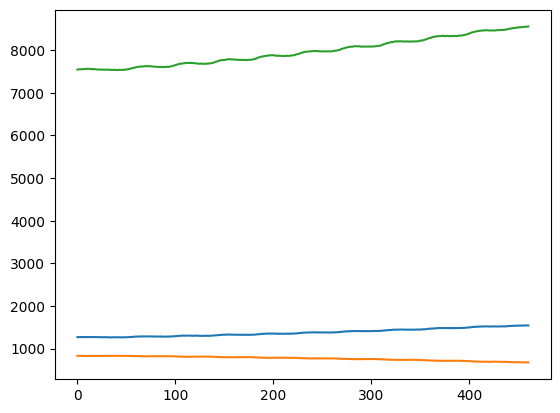

i = 0
-0.01052747462025236 0.0609222265221654 0.00910172271020884
-0.010471661250922078 0.060762877784473306 0.009032607157154962
-0.010514648065426983 0.06075359403981992 0.008772535842826662
-0.01052889678652823 0.06077280941968562 0.009162051892255187
-0.010559464847808528 0.06075453171682748 0.00923068102508539
-0.010562191674672294 0.06067967805978087 0.008789608485857017
0.0 0.0 0.0
-0.010559456554861693 0.06050832240108588 0.009132031072129598
-0.010562534962988417 0.06068697407849821 0.009033577521167018
-0.010492014413827517 0.06050979334284615 0.009122829650379262
i = 10
-0.010597338868534088 0.06044183526804524 0.009356961184335115
-0.010569635302763183 0.0605890801053046 0.009390639420512176
0.0 0.0 0.0
-0.010665384770048183 0.06092740830978799 0.009953556029141676
-0.010560389420442034 0.060644109299514797 0.00936308272369721
-0.010622316038131697 0.06080865821119411 0.009565101479811402
-0.01048216700074223 0.06068724141207086 0.009054126668256295
-0.010524639976191411 0.

/home/lowiek/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [106]:
# Now give the different measurements to fsolve to find the x y z locations
pos_df = measurements_df[["X0", "Y0", "Z0"]].to_numpy()

print(pos_df.shape)

plt.plot(pos_df)
plt.show()

xs = []
ys = []
zs = []
alphas = []
betas = []
gammas = []

for i in range(pos_df.shape[0]):
    if i % 10 == 0:
        print(f"i = {i}")
  
    # This is our target B (= measurement)
    target_B = pos_df[i] / 10 ** 6
    
    # Set target point by using the actual displacement of the probe
    x0 = [0, 0, z_data[i], 0, 0, 0]
    
    # Solve
    x, y, z, a, b, g = fsolve(calculate_B_fsolve, x0, args=(target_B))
    
    print(a, b, g)
    
    if np.isnan(x) or np.isnan(y) or np.isnan(z):
        x = np.nan
        y = np.nan
        z = np.nan
        a = np.nan
        b = np.nan
        g = np.nan
        
    xs.append(x)
    ys.append(y)
    zs.append(z)  
    alphas.append(a)
    betas.append(b)
    gammas.append(g)  

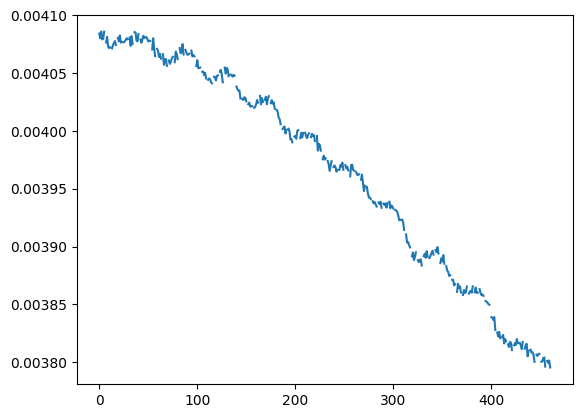

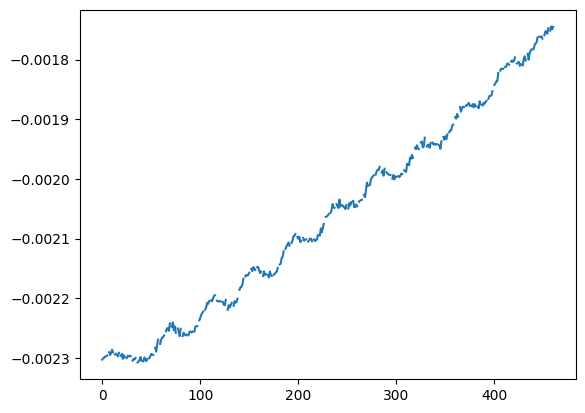

0.001096282404011776


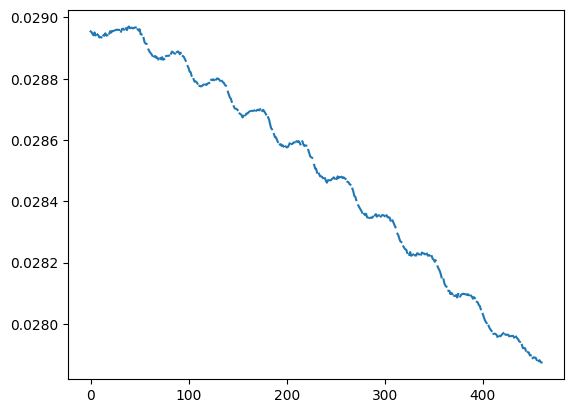

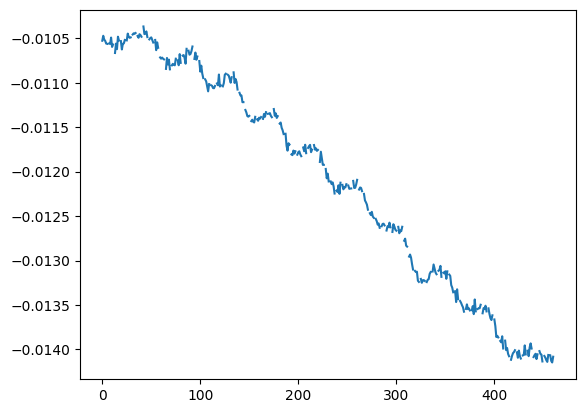

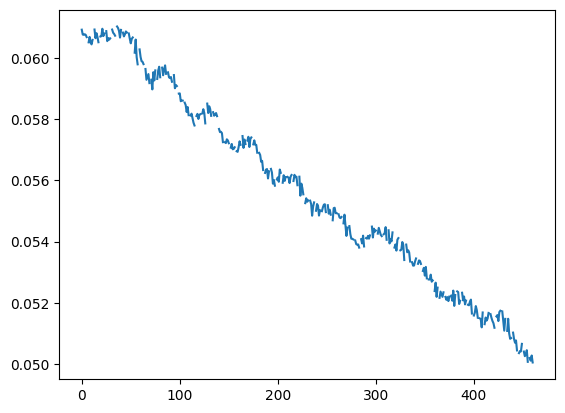

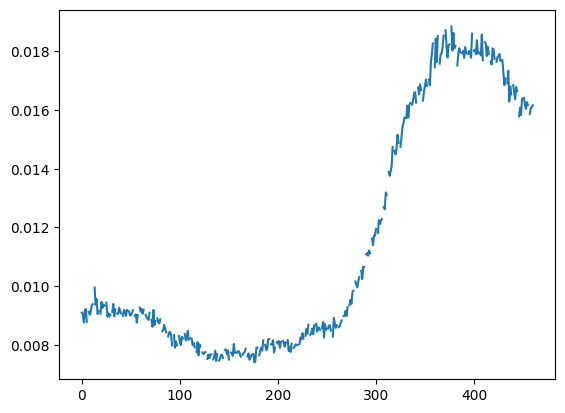

0.001403492


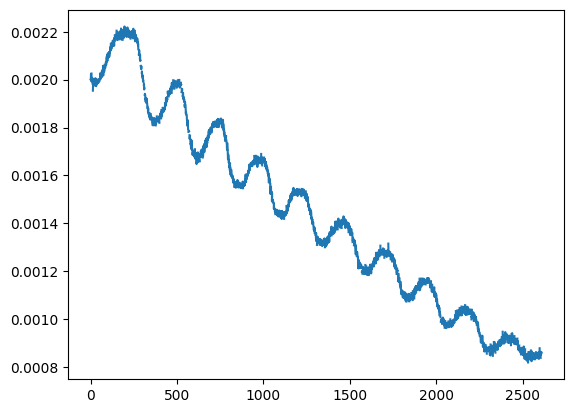

In [107]:
plt.plot(xs)
plt.show()

plt.plot(ys)
plt.show()

zs = np.array(zs)
print(np.max(zs[~np.isnan(zs)]) - np.min(zs[~np.isnan(zs)]))
plt.plot(zs)
plt.show()

plt.plot(alphas)
plt.show()

plt.plot(betas)
plt.show()

plt.plot(gammas)
plt.show()


print(np.max(z_data) - np.min(z_data))
plt.plot(z_data)
plt.show()


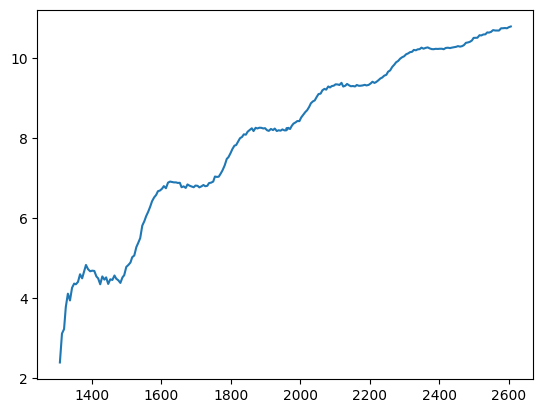

In [42]:
z_level = measurement ** (1/3)
plt.plot(z_level)

# Drake tests

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from pydrake.all import (
    MeshcatVisualizer, MultibodyPlant, Parser, Simulator, SpatialInertia, RotationMatrix,
    Box, CoulombFriction, RigidTransform, SceneGraph, PlanarSceneGraphVisualizer,
    JointIndex, LeafSystem, DiagramBuilder, UnitInertia
)

def build_rubber_slab(mbplant):
    # Material properties
    density = 1000.0  # kg/m^3
    E = 1e6  # Young's modulus in Pa
    nu = 0.49  # Poisson's ratio
    thickness = 0.1  # Thickness of the slab

    # Geometry properties
    width = 1.0
    length = 2.0

    # Inertia calculation
    inertia = SpatialInertia(
        mass=density * width * length * thickness,
        p_PScm_E=np.array([0, 0, 0]),
        G_SP_E=UnitInertia.SolidBox(width, length, thickness))

    # Add the deformable body
    rubber_slab = mbplant.AddDeformableBody(name="rubber_slab",
                                             inertia=inertia,
                                             material_group="rubber")
    
    # Add geometry
    mbplant.RegisterCollisionGeometry(rubber_slab, RigidTransform(), Box(width, length, thickness),
                                       "rubber_slab_collision", CoulombFriction(0.9, 0.8))
    mbplant.RegisterVisualGeometry(rubber_slab, RigidTransform(), Box(width, length, thickness),
                                    "rubber_slab_visual")

    return rubber_slab

# Create the MultibodyPlant
builder = DiagramBuilder()
mbplant = MultibodyPlant(0.001)
scene_graph = SceneGraph()
mbplant.RegisterAsSourceForSceneGraph(scene_graph)
builder.AddSystem(mbplant)
builder.AddSystem(scene_graph)

# Build the rubber slab
rubber_slab = build_rubber_slab(mbplant)

# Connect visualizer
visualizer = MeshcatVisualizer(scene_graph, zmq_url="tcp://127.0.0.1:6000")
builder.AddSystem(visualizer)
builder.Connect(scene_graph.get_pose_bundle_output_port(),
                visualizer.get_input_port(0))

# Build the diagram
diagram = builder.Build()

# Set up the simulator
simulator = Simulator(diagram)
context = simulator.get_mutable_context()

# Set initial conditions if needed
context.SetContinuousState([0.0] * mbplant.num_positions(),
                           [0.0] * mbplant.num_velocities())

# Simulate
simulator.set_target_realtime_rate(1.0)
simulator.AdvanceTo(5.0)  # Simulate for 5 seconds


AttributeError: 'pydrake.multibody.plant.MultibodyPlant' object has no attribute 'AddDeformableBody'